<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("health_insurance.csv")
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


#### Load the health insurance dataset and check the first five observations

In [2]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

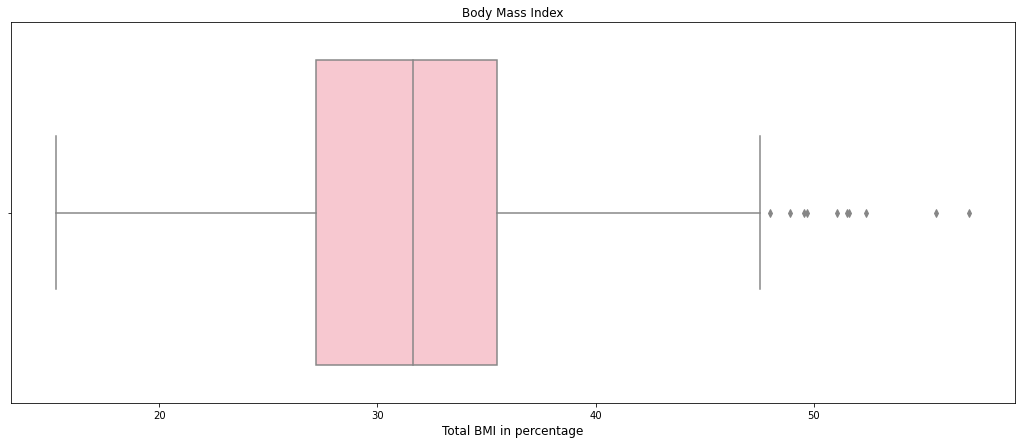

In [3]:
# set the plot size
plt.figure(figsize = (18,7))
# plot a boxplot to check the presence of outliers 
sns.boxplot(df['bmi'].dropna(), color = 'pink')
# add plot and axes labels & set text size using 'fontsize'
plt.title('Body Mass Index', fontsize = 12)
plt.xlabel('Total BMI in percentage', fontsize = 12)
plt.show()

In [5]:
#Any-percentage-above-12.5-is-considered-as-an-outlier-in-the-data.len(DataFrame['Total expenditure'])
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
df_ubl = Q3 + (1.5 * IQR)
df_lbl = Q1 - (1.5 * IQR)
print(df_ubl)
print(df_lbl)
print(IQR)

47.91062499999999
14.785625000000005
8.281249999999996


In [48]:

extreme_values = df_ubl
print(f'Number of extreme observations present from:\n{extreme_values}' " is considered as extreme values of bmi")

Number of extreme observations present from:
47.91062499999999 is considered as extreme values of bmi


In [7]:
# Print some basic statistics about the 'bmi' column
print(df['bmi'].describe())

count    1300.000000
mean       31.581396
std         6.356487
min        15.290000
25%        27.207500
50%        31.645000
75%        35.488750
max        57.130000
Name: bmi, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

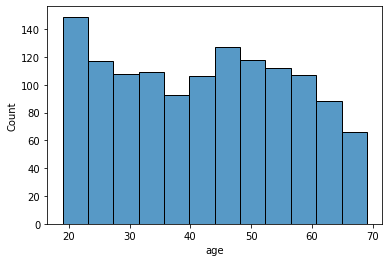

Skewness: 0.04


In [8]:
# Create a histogram of the 'age' column
sns.histplot(df['age'])

# Show the plot
plt.show()

# Calculate the skewness of the 'age' column
skewness = df['age'].skew()
print(f'Skewness: {skewness:.2f}')

In [9]:
# Calculate the mean, median, and standard deviation of the 'age' column
mean = df['age'].mean()
median = df['age'].median()
std = df['age'].std()

# Print the results
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Standard deviation: {std:.2f}')

# Check if the mean and median are significantly different
if abs(mean - median) > std:
    print('Mean and median are significantly different')
else:
    print('Mean and median are not significantly different')

Mean: 42.28
Median: 42.00
Standard deviation: 14.02
Mean and median are not significantly different


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')

Probability of charges less than 25,000: 0.85


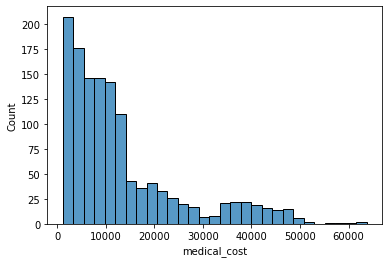

In [11]:
# Calculate the probability of charges less than 25,000
prob = df[df['medical_cost'] < 25000]['medical_cost'].count() / df['medical_cost'].count()

# Print the probability
print(f'Probability of charges less than 25,000: {prob:.2f}')

# Create a histogram of the 'charges' column
sns.histplot(df['medical_cost'])

# Show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

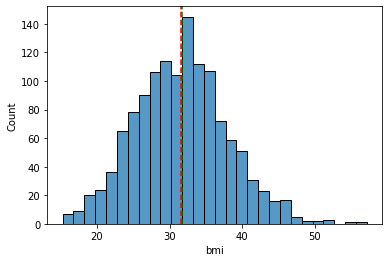

Mean: 31.58
Median: 31.64
Standard deviation: 6.36
Mean and median are not significantly different
Skewness: 0.25


In [12]:
# Calculate the mean and median of the 'bmi' column
mean = df['bmi'].mean()
median = df['bmi'].median()

# Create a histogram of the 'bmi' column
sns.histplot(df['bmi'])

# Add vertical lines for the mean and median
plt.axvline(mean, color='red', linestyle='--')
plt.axvline(median, color='green', linestyle='--')

# Show the plot
plt.show()

# Calculate the mean, median, and standard deviation of the 'age' column
mean = df['bmi'].mean()
median = df['bmi'].median()
std = df['bmi'].std()

# Print the results
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Standard deviation: {std:.2f}')

# Check if the mean and median are significantly different
if abs(mean - median) > std:
    print('Mean and median are significantly different')
else:
    print('Mean and median are not significantly different')
    
# Calculate the skewness of the 'bmi' column
skewness = df['bmi'].skew()
print(f'Skewness: {skewness:.2f}')    
    

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

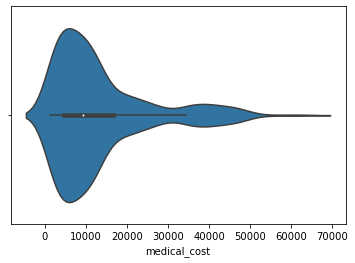

In [13]:
# Violin plot of medical costs
sns.violinplot(x='medical_cost', data=df)

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# Select rows where age is less than 30 and medical cost is greater than 40000
selected_rows = df[(df['age'] < 30) & (df['medical_cost'] > 40000)]

# Check if any rows were selected
if selected_rows.empty:
    print("There are no individuals with age less than 30 and medical cost greater than 40000.")
else:
    print("There are individuals with age less than 30 and medical cost greater than 40000.")


There are individuals with age less than 30 and medical cost greater than 40000.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

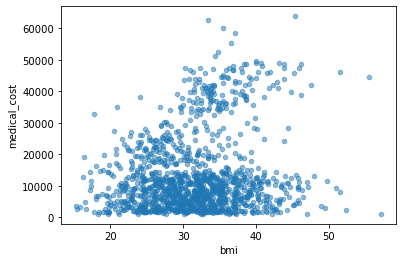

In [15]:
# Scatter plot of BMI and medical cost
df.plot(kind='scatter', x='bmi', y='medical_cost', alpha=0.5)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
mask = df['bmi']=='gender'
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1295    False
1296    False
1297    False
1298    False
1299    False
Name: bmi, Length: 1300, dtype: bool

percentage variation = (mean BMI for gender X - mean BMI for gender Y) / mean BMI for gender Y

In [56]:
# Calculate mean BMI for males and females
mean_bmi_males = df[df.gender == "M"]["bmi"].mean()
mean_bmi_females = df[df.gender == "F"]["bmi"].mean()

# Check if mean BMI for males or females is nan
if np.isnan(mean_bmi_males) or np.isnan(mean_bmi_females):
    # Print error message
    print("Error: Could not calculate percentage variation in BMI for males and females because of missing values")
else:
    # Make sure that mean_bmi_males is not 0
    if mean_bmi_males == 0:
        mean_bmi_males = 1

    # Calculate percentage variation in BMI for males and females
    percentage_variation = (mean_bmi_females - mean_bmi_males) / mean_bmi_males

    print(percentage_variation)

Error: Could not calculate percentage variation in BMI for males and females because of missing values


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# Filter for rows where gender is male
df = df[df.gender == "M"]

# Count the number of males in each region
region_counts = df["region"].value_counts()

# Find the region with the highest number of males
highest_region = region_counts.index[0]

print(highest_region)

southeast


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

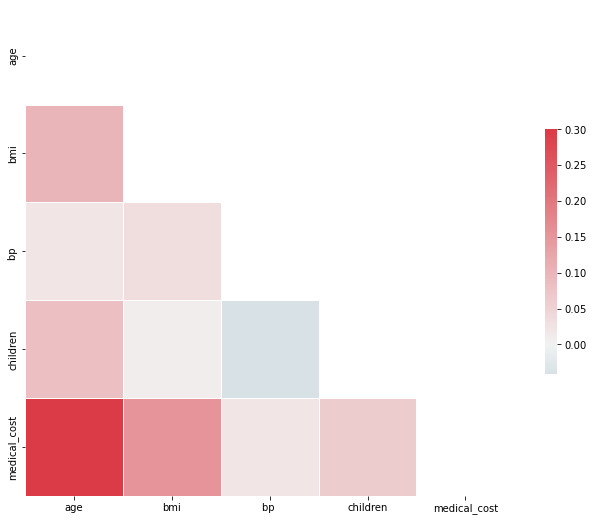

In [19]:
import seaborn as sns

# Calculate pairwise correlations
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

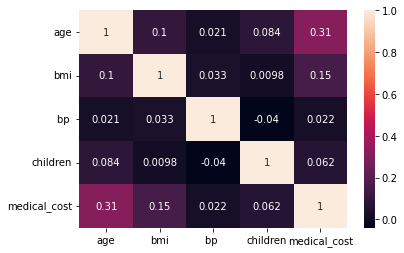

In [20]:
import seaborn as sns

# Visualize correlations using a heatmap
sns.heatmap(corr, annot=True)

In [21]:
numeric_df = df.select_dtypes(include=['float', 'int'])
numeric_df

,age,bmi,bp,children,medical_cost
0,23,31.90,157,0,16884.9240
5,33,25.74,152,0,3756.6216
6,48,31.44,150,1,8240.5896
8,36,31.92,137,1,37701.8768
9,60,27.72,142,3,14001.1338
...,...,...,...,...,...
1294,54,42.70,156,3,11411.6850
1296,22,34.92,156,0,2205.9808
1297,21,34.85,145,0,1629.8335
1298,22,24.80,150,0,2007.9450


<AxesSubplot:>

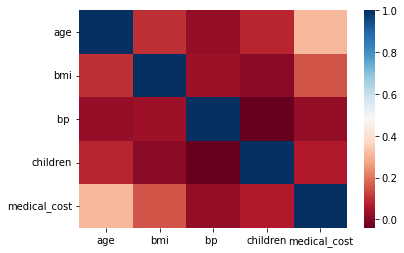

In [22]:
import seaborn as sns

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [23]:
corr_age_medical_cost = corr.loc["age", "medical_cost"]
corr_age_medical_cost 

0.3117692689028615

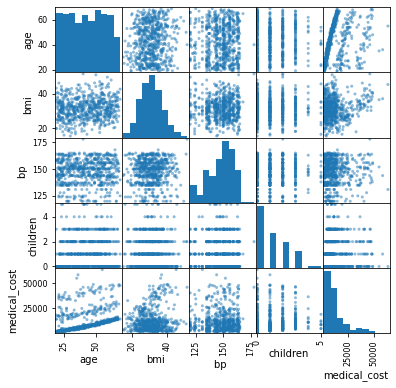

In [24]:
# Import plotting module
from pandas.plotting import scatter_matrix

# Create a scatter plot matrix
scatter_matrix(df, figsize=(6, 6))

# Show plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
print(df.columns)

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')


In [26]:
df = pd.get_dummies(df, columns=["smoker"])

In [27]:
df.head(1)

,age,gender,bmi,bp,children,region,medical_cost,smoker_non-smoker,smoker_smoker
0,23,M,31.9,157,0,southwest,16884.924,0,1


In [28]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
r, p = pearsonr(df["medical_cost"], df["smoker_smoker"])
print(f"Pearson correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")

Pearson correlation coefficient: 0.750
p-value: 0.000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
r, p = pearsonr(df["age"], df["medical_cost"])
print(f"Pearson correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")

Pearson correlation coefficient: 0.312
p-value: 0.000


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit label encoder to region column
le.fit(df["region"])

# Transform region column
df["region"] = le.transform(df["region"])

In [31]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
r, p = pearsonr(df["region"], df["medical_cost"])

print(f"Pearson correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")

Pearson correlation coefficient: -0.095
p-value: 0.015


<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
df.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'medical_cost',
       'smoker_non-smoker', 'smoker_smoker'],
      dtype='object')

In [33]:
df = pd.get_dummies(df, columns=['region'])
df.head(2)

,age,gender,bmi,bp,children,medical_cost,smoker_non-smoker,smoker_smoker,region_0,region_1,region_2,region_3
0,23,M,31.90,157,0,16884.9240,0,1,0,0,0,1
5,33,M,25.74,152,0,3756.6216,1,0,0,0,1,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'smoker' column
df['smoker_label'] = le.fit_transform(df['smoker_non-smoker'])

# Print the unique labels
print(le.classes_)

[0 1]


In [35]:
df['smoker_label']

0       0
5       1
6       1
8       0
9       1
       ..
1294    1
1296    1
1297    1
1298    1
1299    0
Name: smoker_label, Length: 643, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# Create a variable `gender_counts` which contains the frequency of each gender
gender_counts = df['gender'].value_counts()

# Print the value counts for each gender
print(gender_counts)

M    643
Name: gender, dtype: int64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
df['smoker_binary'] = df['smoker_smoker'].apply(lambda x: 1 if x == 1 else 0)

In [38]:
df['smoker_binary'].head()

0    1
5    0
6    0
8    1
9    0
Name: smoker_binary, dtype: int64

<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the 'bmi' column
df['bmi_normalized'] = scaler.fit_transform(df[['bmi']])

# Print the mean and standard deviation of the 'bmi_normalized' column
print(df['bmi_normalized'].mean())
print(df['bmi_normalized'].std())

1.6454782931069583e-16
1.000778513158008


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'age' column
df['age'] = scaler.fit_transform(df[['age']])

# Check the range of the 'age' column
print(df['age'].min())
print(df['age'].max())

0.0
1.0


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
from scipy.stats import skew

skewness = skew(df['medical_cost'])
print(skewness)

1.7167599771155124


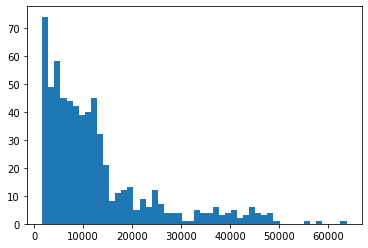

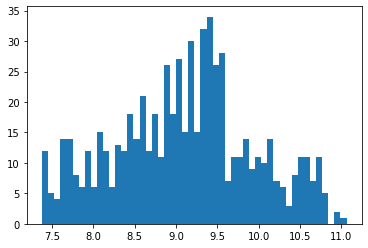

In [47]:
import numpy as np

# Apply log transformation to the data
data_log = np.log(df['medical_cost'])

# Plot the original data and the transformed data
import matplotlib.pyplot as plt
plt.hist(df['medical_cost'], bins=50)
plt.show()
plt.hist(data_log, bins=50)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [42]:
df['log_medical_cost'] = np.log(df['medical_cost'])

In [43]:
medical_cost_transformed = np.exp(df['log_medical_cost'])

In [44]:
medical_cost_transformed 

0       16884.9240
5        3756.6216
6        8240.5896
8       37701.8768
9       14001.1338
           ...    
1294    11411.6850
1296     2205.9808
1297     1629.8335
1298     2007.9450
1299    29141.3603
Name: log_medical_cost, Length: 643, dtype: float64

In [45]:
# Compare the 'medical_cost' and the transformed data
print(df['medical_cost'].head())
print(medical_cost_transformed.head())

0    16884.9240
5     3756.6216
6     8240.5896
8    37701.8768
9    14001.1338
Name: medical_cost, dtype: float64
0    16884.9240
5     3756.6216
6     8240.5896
8    37701.8768
9    14001.1338
Name: log_medical_cost, dtype: float64


The output shows the values of the 'medical_cost' and 'log_medical_cost' columns for the first 5 rows of the data. It seems that the values in the 'log_medical_cost' column are the same as the values in the 'medical_cost' column, which means that the log transformation was not applied to the 'medical_cost' values.